# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Neysa Salsabila Rahmawati
- **Email:** neysa0322@gmail.com
- **ID Dicoding:** neysasls

## Menentukan Pertanyaan Bisnis

**Performa Pemesanan**
- Bagaimana tingkat jumlah pemesanan per bulan pada tahun 2017 dan 2018?

**Performa Pendapatan**
- Bagaimana tingkat pendapatan per bulan pada tahun 2017 dan 2018?

**Performa Setiap Kategori**
- Apa kategori produk yang paling banyak terjual dan paling sedikit terjual?
- Apa kategori produk dengan pendapatan terbanyak dan tersedikit?

**RFM Analysis**
- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian?
- Berapa banyak uang yang dihabiskan pelanggan?

## Import Semua Packages/Library yang Digunakan

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

Input seluruh dataset yang diperlukan, yaitu:
- orders_df = orders_dataset.csv
- payments_df = order_paymens_dataset.csv
- order_items_df = order_items_dataset.csv
- product_category_df = product_category.csv
- products_df = products_dataset.csv
- customers_df = customers_dataset.csv

In [171]:
!gdown --id 1xDQHYOSQQpedue8kE5GsInzjsR0tWh1Q
!gdown --id 1EHYzdcML7_M_n5eVBFJ0H9DO8azVHB-Y
!gdown --id 1tP2GESbtoUDGut_YPHizyQpz9nalCZck
!gdown --id 1HDIZCEeU4Y-aWO-ds1rEvPeTR12U_RpC
!gdown --id 1RQkBkb1x8m7llKYUYNwbxaM_vWst4-eA
!gdown --id 14N8J0fBc2pyWXyWdQ-OhO0MOMbbu8vPR

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xDQHYOSQQpedue8kE5GsInzjsR0tWh1Q
To: /content/orders_dataset.csv
100% 17.7M/17.7M [00:00<00:00, 78.8MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1EHYzdcML7_M_n5eVBFJ0H9DO8azVHB-Y
To: /content/order_payments_dataset.csv
100% 5.78M/5.78M [00:00<00:00, 204MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https:

In [172]:
orders_df = pd.read_csv('orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [173]:
payments_df = pd.read_csv('order_payments_dataset.csv')
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [174]:
order_items_df = pd.read_csv('order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [175]:
product_category_df = pd.read_csv('product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [176]:
products_df = pd.read_csv('products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [177]:
customers_df = pd.read_csv('customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Merge payments_df dan orders_df menjadi revenue_df untuk pertanyaan kedua:

In [178]:
revenue_df = pd.merge(
    left=payments_df,
    right=orders_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)
revenue_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04 00:00:00
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12 00:00:00
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,NaN,NaN,2017-12-05 00:00:00
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,delivered,2018-08-07 23:26:13,2018-08-07 23:45:00,2018-08-09 11:46:00,2018-08-21 22:41:46,2018-08-24 00:00:00


Merge order_items_df, products_df, dan product_category_df menjadi sold_df untuk menjawab pertanyaan ketiga

In [179]:
sold1_df = pd.merge(
    left=order_items_df,
    right=products_df,
    how="inner",
    left_on="product_id",
    right_on="product_id"
)
sold1_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,ferramentas_jardim,37.0,653.0,1.0,6700.0,35.0,12.0,22.0
112646,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,moveis_decoracao,30.0,308.0,1.0,2300.0,37.0,30.0,20.0
112647,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,relogios_presentes,33.0,658.0,3.0,400.0,19.0,9.0,15.0
112648,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,esporte_lazer,32.0,280.0,2.0,2700.0,60.0,15.0,15.0


In [180]:
sold_df = pd.merge(
    left=sold1_df,
    right=product_category_df,
    how="inner",
    left_on="product_category_name",
    right_on="product_category_name"
)
sold_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.90,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.90,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.90,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111018,b99217b1fcf2fdeace7b8d869b76cb91,1,57bdf3098169cccdb62221bd3e089cbd,d98eec89afa3380e14463da2aabaea72,2018-03-13 17:55:36,39.99,10.15,fashion_roupa_infanto_juvenil,38.0,168.0,1.0,100.0,16.0,16.0,16.0,fashion_childrens_clothes
111019,bc3ac768a8963f4ca68942ea6558fc9f,1,57bdf3098169cccdb62221bd3e089cbd,d98eec89afa3380e14463da2aabaea72,2018-03-28 03:09:01,39.99,6.43,fashion_roupa_infanto_juvenil,38.0,168.0,1.0,100.0,16.0,16.0,16.0,fashion_childrens_clothes
111020,cab08f0417a702d0f4782ec02356a4ac,1,8cfc3506cedc0626364457d254429118,dbb9b48c841a0e39e21f98e1a6b2ec3e,2017-10-09 04:28:12,89.99,17.07,fashion_roupa_infanto_juvenil,47.0,327.0,3.0,300.0,30.0,20.0,20.0,fashion_childrens_clothes
111021,cb53f0b6e8f9082a9f5a113765dd1236,1,8cfc3506cedc0626364457d254429118,dbb9b48c841a0e39e21f98e1a6b2ec3e,2018-06-11 22:50:09,89.99,7.49,fashion_roupa_infanto_juvenil,47.0,327.0,3.0,300.0,30.0,20.0,20.0,fashion_childrens_clothes


Merge sold_df dan payments_df menjadi sold_revenue_df untuk menjawab pertanyaan keempat

In [181]:
sold_revenue_df = pd.merge(
    left=sold_df,
    right=payments_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)
sold_revenue_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,1,credit_card,2,72.19
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.90,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,1,boleto,1,73.86
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.90,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,1,credit_card,2,83.23
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.90,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,1,credit_card,3,75.07
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,1,credit_card,4,72.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115873,3da4b0f0c89bb8fee8a810459e641414,1,28ac6af4008a402e5039f3e042a36e13,28ea411b354f14b1a494be4e79f0ce02,2017-06-15 18:20:19,110.00,8.96,fashion_roupa_infanto_juvenil,48.0,488.0,5.0,500.0,36.0,10.0,26.0,fashion_childrens_clothes,1,credit_card,1,118.96
115874,9fa3a005f89a187501fa1bd63d6125fb,1,57bdf3098169cccdb62221bd3e089cbd,d98eec89afa3380e14463da2aabaea72,2017-10-16 01:17:50,39.99,14.10,fashion_roupa_infanto_juvenil,38.0,168.0,1.0,100.0,16.0,16.0,16.0,fashion_childrens_clothes,1,credit_card,1,54.09
115875,cab08f0417a702d0f4782ec02356a4ac,1,8cfc3506cedc0626364457d254429118,dbb9b48c841a0e39e21f98e1a6b2ec3e,2017-10-09 04:28:12,89.99,17.07,fashion_roupa_infanto_juvenil,47.0,327.0,3.0,300.0,30.0,20.0,20.0,fashion_childrens_clothes,1,boleto,1,107.06
115876,cb53f0b6e8f9082a9f5a113765dd1236,1,8cfc3506cedc0626364457d254429118,dbb9b48c841a0e39e21f98e1a6b2ec3e,2018-06-11 22:50:09,89.99,7.49,fashion_roupa_infanto_juvenil,47.0,327.0,3.0,300.0,30.0,20.0,20.0,fashion_childrens_clothes,1,credit_card,6,97.48


Merge order_items_df, payments_df, dan customers_df untuk menjawab pertanyaan nomor 5:

In [182]:
rfm_df = pd.merge(
    left=revenue_df,
    right=customers_df,
    how="inner",
    left_on="customer_id",
    right_on="customer_id"
)
rfm_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00,4291db0da71914754618cd789aebcd56,18570,conchas,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04 00:00:00,b6027ac07fb76ebca8c97b1887865aee,12954,atibaia,SP
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12 00:00:00,53b30ca78efb2b7efcd3f9e461587eb2,30210,belo horizonte,MG
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,NaN,NaN,2017-12-05 00:00:00,d3c7da954a324253814096bcaf240e4e,1519,sao paulo,SP
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,delivered,2018-08-07 23:26:13,2018-08-07 23:45:00,2018-08-09 11:46:00,2018-08-21 22:41:46,2018-08-24 00:00:00,b84dc68f02f122a88d7e7bbd37b06204,22733,rio de janeiro,RJ


### Assessing Data

Mengidentifikasi missing value pada seluruh dataset:

In [183]:
print("order_df: \n", orders_df.isnull().sum(),)
print("\n revenue_df: \n",revenue_df.isnull().sum())
print("\n sold_df: \n",sold_df.isnull().sum())
print("\n sold_revenue_df \n",sold_revenue_df.isnull().sum())
print("\n rfm_df \n",rfm_df.isnull().sum())

order_df: 
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

 revenue_df: 
 order_id                            0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
order_estimated_delivery_date       0
dtype: int64

 sold_df: 
 order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              

Mengidentifikasi duplicated data:

In [184]:
print("Jumlah duplicated data pada orders_df: ",orders_df.duplicated().sum())
print("Jumlah duplicated data pada revenue_df: ",payments_df.duplicated().sum())
print("Jumlah duplicated data pada sold_df: ",order_items_df.duplicated().sum())
print("Jumlah duplicated data pada sold_revenue_df: ",product_category_df.duplicated().sum())
print("Jumlah duplicated data pada rfm_df: ",rfm_df.duplicated().sum())

Jumlah duplicated data pada orders_df:  0
Jumlah duplicated data pada revenue_df:  0
Jumlah duplicated data pada sold_df:  0
Jumlah duplicated data pada sold_revenue_df:  0
Jumlah duplicated data pada rfm_df:  0


In [185]:
print(orders_df.info())
print(revenue_df.info())
print(sold_df.info())
print(sold_revenue_df.info())
print(rfm_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 103886 entries, 0 to 103885
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id           

Terlihat hasil terdapat kesalahan data type pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date yang seharusnya berupa date

In [186]:
print(orders_df.describe())
print(revenue_df.describe())
print(sold_df.describe())
print(sold_revenue_df.describe())
print(rfm_df.describe())

                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-04-11 10:48:14  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top             2018-05-09 15:48:00           2018-05-08

Terlihat hasil tidak terdapat outlier pada data

### Cleaning Data

**Menghapus missing value pada dataset**

Namun pada dataset order_df, revenue_df dan rfm_df memungkinkan untuk adanya missing value karena memungkinkan adanya order yang belum diapprove dan dikirim saat data dimuat

Karena pada sold_df dan sold_revenue_df hanya terdapat 1 missing value maka data dapat dihapus

In [187]:
sold_df.dropna(inplace=True)
sold_revenue_df.dropna(inplace=True)
print(sold_df.isnull().sum())
print(sold_revenue_df.isnull().sum())

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64
order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product

Mengubah tipe data date

In [188]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])
  revenue_df[column] = pd.to_datetime(revenue_df[column])
  rfm_df[column] = pd.to_datetime(rfm_df[column])

Cek kembali apakah tipe data telah sesuai

In [189]:
print(orders_df.info())
print(revenue_df.info())
print(rfm_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 103886 entries, 0 to 103885
Data columns (total 12 columns):
 #   Column                         Non-Null Co

Karena tidak terdapat outlier dan duplicated data maka tidak ada penanganan untuk hal tersebut

## Exploratory Data Analysis (EDA)

### Explore ...

In [190]:
orders_df.describe(include="all")

<ipython-input-190-903538279252>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
<ipython-input-190-903538279252>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
<ipython-input-190-903538279252>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
<ipython-input-190-903538279252>:1: FutureW

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [191]:
revenue_df.describe(include="all")

<ipython-input-191-fdbccf64daed>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  revenue_df.describe(include="all")
<ipython-input-191-fdbccf64daed>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  revenue_df.describe(include="all")
<ipython-input-191-fdbccf64daed>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  revenue_df.describe(include="all")
<ipython-input-191-fdbccf64daed>:1: Futu

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,103886,103886.000000,103886,103886.000000,103886.000000,103886,103886,103886,103711,101998,100754,103886
unique,99440,NaN,5,NaN,NaN,99440,8,98874,90732,81017,95663,458
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN,9af2372a1e49340278e7c1ef8d749f34,delivered,2017-04-20 12:45:34,2017-04-22 09:10:13,2018-05-09 15:48:00,2017-06-22 16:04:46,2017-12-20 00:00:00
freq,29,NaN,76795,NaN,NaN,29,100756,29,29,47,26,563
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-04 21:15:19,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00
mean,NaN,1.092679,NaN,2.853349,154.100380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.706584,NaN,2.687051,217.494064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,1.000000,56.790000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
sold_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
count,111022,111022.000000,111022,111022,111022,111022.000000,111022.000000,111022,111022.000000,111022.000000,111022.000000,111022.000000,111022.000000,111022.000000,111022.000000,111022
unique,97255,NaN,32327,3033,92052,NaN,NaN,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2018-03-01 02:50:48,NaN,NaN,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table
freq,21,NaN,527,2033,21,NaN,NaN,11115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11115
mean,NaN,1.198231,NaN,NaN,NaN,120.738772,20.025485,NaN,48.774432,787.870854,2.209562,2099.897507,30.212210,16.624966,23.042172,NaN
std,NaN,0.706934,NaN,NaN,NaN,183.292804,15.841529,NaN,10.025942,652.172826,1.721434,3754.972723,16.190473,13.468184,11.717712,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.310000,NaN,52.000000,602.500000,1.000000,700.000000,25.000000,13.000000,20.000000,NaN
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.180000,NaN,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,NaN


In [193]:
sold_revenue_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value
count,115877,115877.000000,115877,115877,115877,115877.000000,115877.000000,115877,115877.000000,115877.000000,115877.000000,115877.000000,115877.000000,115877.000000,115877.000000,115877,115877.000000,115877,115877.000000,115877.000000
unique,97254,NaN,32327,3033,92051,NaN,NaN,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71,NaN,4,NaN,NaN
top,895ab968e7bb0d5659d16cd74cd1650c,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,2017-08-14 20:43:31,NaN,NaN,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table,NaN,credit_card,NaN,NaN
freq,63,NaN,536,2133,63,NaN,NaN,11823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11823,NaN,85522,NaN,NaN
mean,NaN,1.196320,NaN,NaN,NaN,120.909070,20.075808,NaN,48.766019,786.955755,2.207720,2117.594190,30.311554,16.656886,23.110445,NaN,1.092831,NaN,2.945511,173.001216
std,NaN,0.699566,NaN,NaN,NaN,184.140924,15.870955,NaN,10.035355,653.074676,1.719525,3785.744297,16.225837,13.480721,11.758209,NaN,0.725316,NaN,2.779913,268.060699
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN,42.000000,347.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN,1.000000,NaN,1.000000,61.010000
50%,NaN,1.000000,NaN,NaN,NaN,74.900000,16.320000,NaN,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000,NaN,1.000000,NaN,2.000000,108.200000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.220000,NaN,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,NaN,1.000000,NaN,4.000000,189.720000


In [194]:
rfm_df.describe(include="all")

<ipython-input-194-66ce369484b6>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  rfm_df.describe(include="all")
<ipython-input-194-66ce369484b6>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  rfm_df.describe(include="all")
<ipython-input-194-66ce369484b6>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  rfm_df.describe(include="all")
<ipython-input-194-66ce369484b6>:1: FutureWarning: T

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,103886,103886.000000,103886,103886.000000,103886.000000,103886,103886,103886,103711,101998,100754,103886,103886,103886.000000,103886,103886
unique,99440,NaN,5,NaN,NaN,99440,8,98874,90732,81017,95663,458,96095,NaN,4119,27
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN,9af2372a1e49340278e7c1ef8d749f34,delivered,2017-04-20 12:45:34,2017-04-22 09:10:13,2018-05-09 15:48:00,2017-06-22 16:04:46,2017-12-20 00:00:00,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP
freq,29,NaN,76795,NaN,NaN,29,100756,29,29,47,26,563,33,NaN,16221,43622
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-04 21:15:19,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35072.550555,NaN,NaN
std,NaN,0.706584,NaN,2.687051,217.494064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29743.491677,NaN,NaN
min,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,1.000000,NaN,1.000000,56.790000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11366.250000,NaN,NaN


**untuk menjawab pertanyaan pertama**

In [195]:
orders_2018_df = orders_df[orders_df['order_purchase_timestamp'] > '2017-12-31 23:59:59']
orders_2016_2017_df = orders_df[orders_df['order_purchase_timestamp'] < '2018-01-01 00:00:00']
orders_2017_df = orders_2016_2017_df[orders_2016_2017_df['order_purchase_timestamp']>'2016-12-31 00:00:00']

In [196]:
orders_2018_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
12,82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,delivered,2018-06-07 10:06:19,2018-06-09 03:13:12,2018-06-11 13:29:00,2018-06-19 12:05:52,2018-07-18
13,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,delivered,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08


In [197]:
orders_2017_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07


In [198]:
grouped_orders_2017_df = orders_2017_df.groupby(pd.Grouper(key='order_purchase_timestamp', freq='M')).agg({
    "order_id" : "count"
})
grouped_orders_2017_df

,order_id
order_purchase_timestamp,
2017-01-31,800
2017-02-28,1780
2017-03-31,2682
2017-04-30,2404
2017-05-31,3700
2017-06-30,3245
2017-07-31,4026
2017-08-31,4331
2017-09-30,4285


In [199]:
grouped_orders_2018_df = orders_2018_df.groupby(pd.Grouper(key='order_purchase_timestamp', freq='M')).agg({
    "order_id" : "count"
})

grouped_orders_2018_df

,order_id
order_purchase_timestamp,
2018-01-31,7269
2018-02-28,6728
2018-03-31,7211
2018-04-30,6939
2018-05-31,6873
2018-06-30,6167
2018-07-31,6292
2018-08-31,6512
2018-09-30,16


**untuk menjawab pertanyaan kedua**

In [200]:
revenue_2018_df = revenue_df[revenue_df['order_purchase_timestamp'] > '2017-12-31 23:59:59']
revenue_2016_2017_df = revenue_df[revenue_df['order_purchase_timestamp'] < '2018-01-01 00:00:00']
revenue_2017_df = revenue_2016_2017_df[revenue_2016_2017_df['order_purchase_timestamp']>'2016-12-31 00:00:00']

In [201]:
revenue_2018_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12,a24e6f72471e9dbafcb292bc318f4859,delivered,2018-05-07 13:20:41,2018-05-07 15:31:14,2018-05-10 13:35:00,2018-05-14 19:02:54,2018-05-23
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09,68c9dafdf193586c290b19c71541357a,delivered,2018-07-22 14:07:35,2018-07-23 11:32:08,2018-07-23 12:58:00,2018-07-28 15:03:04,2018-08-14


In [202]:
revenue_2017_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16,206c0fcc717333d169ff95933fb47341,delivered,2017-06-23 13:11:27,2017-06-23 13:25:19,2017-06-26 17:33:37,2017-07-03 15:59:46,2017-07-17
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84,4d7a9b8bba459dce09d1b8fa637a0cba,delivered,2017-06-05 10:45:54,2017-06-05 10:55:16,2017-06-14 10:26:00,2017-06-23 12:18:32,2017-06-26
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95,c4e17eff78176dfe3401f03db0346f85,delivered,2017-07-04 20:32:10,2017-07-06 03:15:36,2017-07-06 13:27:31,2017-07-13 19:34:27,2017-07-26


In [203]:
grouped_revenue_2017_df = revenue_2017_df.groupby(pd.Grouper(key='order_purchase_timestamp', freq='M')).agg({
    "payment_value" : "sum"
})
grouped_revenue_2017_df

,payment_value
order_purchase_timestamp,
2017-01-31,138488.04
2017-02-28,291908.01
2017-03-31,449863.60
2017-04-30,417788.03
2017-05-31,592918.82
2017-06-30,511276.38
2017-07-31,592382.92
2017-08-31,674396.32
2017-09-30,727762.45


In [204]:
grouped_revenue_2018_df = revenue_2018_df.groupby(pd.Grouper(key='order_purchase_timestamp', freq='M')).agg({
    "payment_value" : "sum"
})
grouped_revenue_2018_df

,payment_value
order_purchase_timestamp,
2018-01-31,1115004.18
2018-02-28,992463.34
2018-03-31,1159652.12
2018-04-30,1160785.48
2018-05-31,1153982.15
2018-06-30,1023880.50
2018-07-31,1066540.75
2018-08-31,1022425.32
2018-09-30,4439.54


**untuk menjawab pertanyaan nomor 3**

In [205]:
all_sell_df = sold_df.groupby(by="product_category_name_english").order_id.nunique().reset_index().sort_values(by='order_id', ascending=False)

all_sell_df

,product_category_name_english,order_id
7,bed_bath_table,9417
43,health_beauty,8836
65,sports_leisure,7720
15,computers_accessories,6689
39,furniture_decor,6449
...,...,...
3,arts_and_craftmanship,23
52,la_cuisine,13
11,cds_dvds_musicals,12
29,fashion_childrens_clothes,8


Terdapat 70 kategori product

In [206]:
top_sell_df = all_sell_df.head(10)
print(top_sell_df)

bad_sell_df = all_sell_df.tail(10)
print(bad_sell_df)

   product_category_name_english  order_id
7                 bed_bath_table      9417
43                 health_beauty      8836
65                sports_leisure      7720
15         computers_accessories      6689
39               furniture_decor      6449
49                    housewares      5884
70                 watches_gifts      5624
68                     telephony      4199
5                           auto      3897
69                          toys      3886
   product_category_name_english  order_id
55                         music        38
35                       flowers        29
23           diapers_and_hygiene        27
32                 fashion_sport        27
46                home_comfort_2        24
3          arts_and_craftmanship        23
52                    la_cuisine        13
11             cds_dvds_musicals        12
29     fashion_childrens_clothes         8
61         security_and_services         2


**untuk menjawab pertanyaan nomor 4**

In [207]:
all_revenue_df = sold_revenue_df.groupby(by="product_category_name_english").payment_value.sum().reset_index().sort_values(by='payment_value', ascending=False)

all_revenue_df

,product_category_name_english,payment_value
7,bed_bath_table,1712553.67
43,health_beauty,1657373.12
15,computers_accessories,1585330.45
39,furniture_decor,1430176.39
70,watches_gifts,1429216.68
...,...,...
35,flowers,2213.01
46,home_comfort_2,1710.54
11,cds_dvds_musicals,1199.43
29,fashion_childrens_clothes,785.67


In [208]:
top_revenue_df = all_revenue_df.head(10)
print(top_revenue_df)

bad_revenue_df = all_revenue_df.tail(10)
print(bad_revenue_df)

   product_category_name_english  payment_value
7                 bed_bath_table     1712553.67
43                 health_beauty     1657373.12
15         computers_accessories     1585330.45
39               furniture_decor     1430176.39
70                 watches_gifts     1429216.68
65                sports_leisure     1392127.56
49                    housewares     1094758.13
5                           auto      852294.33
42                  garden_tools      838280.75
20                    cool_stuff      779698.00
   product_category_name_english  payment_value
27        fashio_female_clothing        5109.62
23           diapers_and_hygiene        4221.25
32                 fashion_sport        3645.92
52                    la_cuisine        2913.53
3          arts_and_craftmanship        2326.17
35                       flowers        2213.01
46                home_comfort_2        1710.54
11             cds_dvds_musicals        1199.43
29     fashion_childrens_clothes        

**untuk menjawab pertanyaan nomor 5**

In [209]:
rfm = rfm_df.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "payment_value": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm.columns = ["customer_unique_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm["max_order_timestamp"] = rfm["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm["recency"] = rfm["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm.drop("max_order_timestamp", axis=1, inplace=True)
rfm.sort_values(by="monetary", ascending=True)

,customer_unique_id,frequency,monetary,recency
56518,968fac81e2c44fb6c1e3ac2a45e6a102,1,0.00,44
29977,4fa4365000c7090fcb8cad5713c6d3db,1,0.00,50
18643,317cfc692e3f86c45c95697c61c853a6,1,9.59,53
71051,bd06ce0e06ad77a7f681f1a4960a3cc6,1,10.07,399
67387,b33336f46234b24a613ad9064d13106d,1,10.89,118
...,...,...,...,...
82807,dc4802a71eae9be1dd28f5d788ceb526,1,6929.31,612
44447,763c8b1c9c68a0229c42c9fc6f662b93,1,7274.88,94
81961,da122df9eeddfedc1dc1f5349a1a690c,2,7571.63,564
26456,46450c74a0d8c5ca9395da1daac6c120,3,9553.02,61


## Visualization & Explanatory Analysis

### Pertanyaan 1:

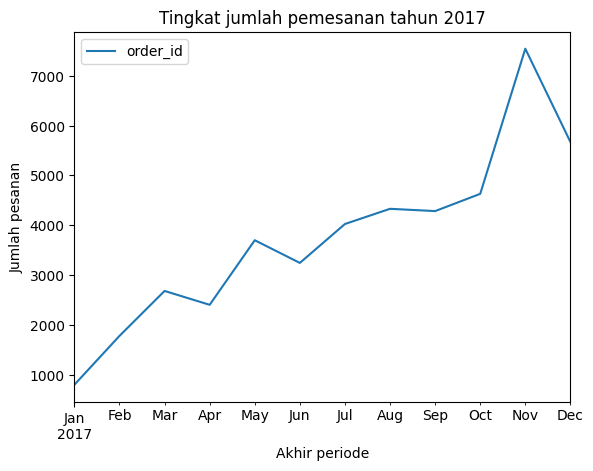

In [210]:
grouped_orders_2017_df.plot(kind='line')
plt.xlabel('Akhir periode')
plt.ylabel('Jumlah pesanan')
plt.title('Tingkat jumlah pemesanan tahun 2017')
plt.show()

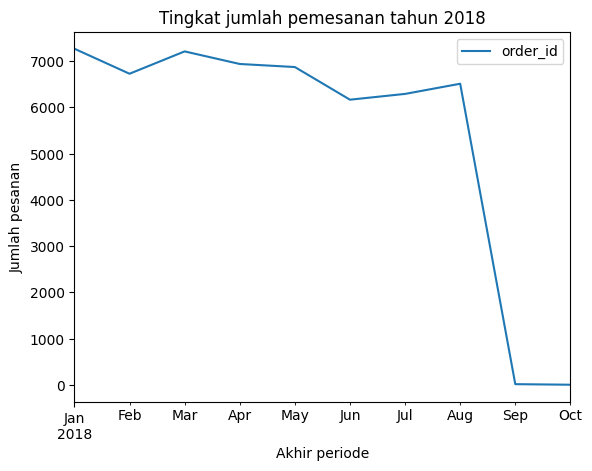

In [211]:
grouped_orders_2018_df.plot(kind='line')
plt.xlabel('Akhir periode')
plt.ylabel('Jumlah pesanan')
plt.title('Tingkat jumlah pemesanan tahun 2018')
plt.show()

### Pertanyaan 2:

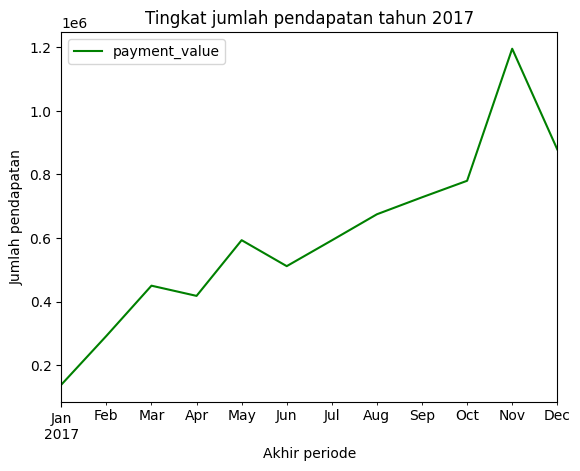

In [212]:
grouped_revenue_2017_df.plot(kind='line', color = 'green')
plt.xlabel('Akhir periode')
plt.ylabel('Jumlah pendapatan')
plt.title('Tingkat jumlah pendapatan tahun 2017')
plt.show()

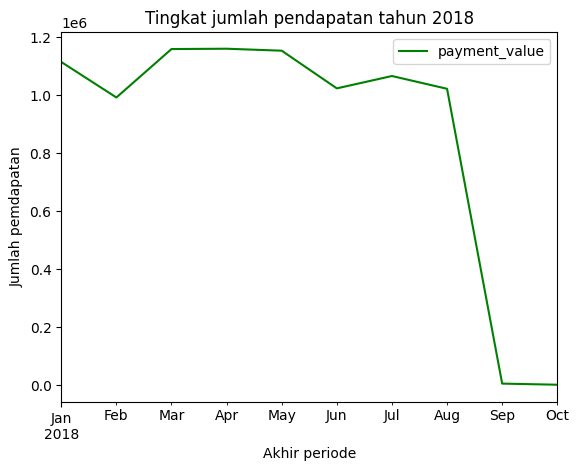

In [213]:
grouped_revenue_2018_df.plot(kind='line', color='green')
plt.xlabel('Akhir periode')
plt.ylabel('Jumlah pemdapatan')
plt.title('Tingkat jumlah pendapatan tahun 2018')
plt.show()

##Pertanyaan 3:

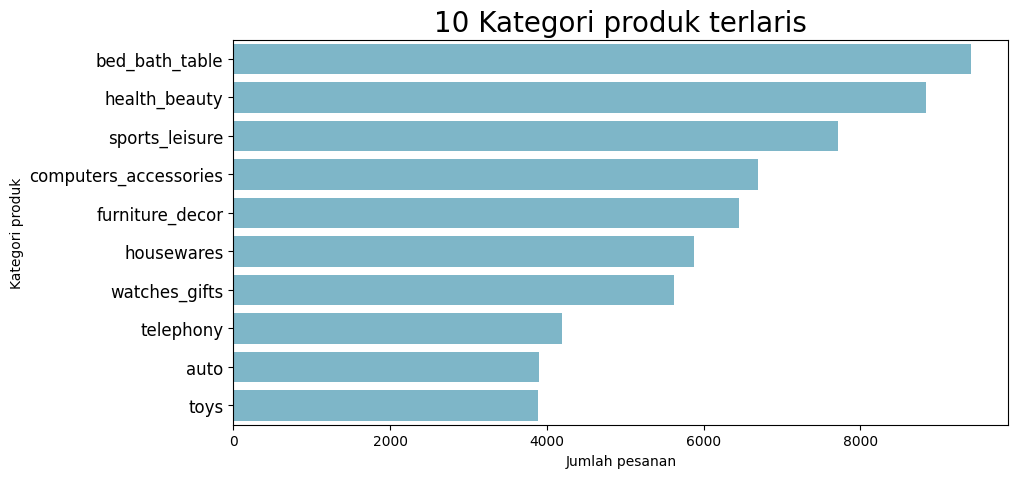

In [214]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x="order_id",
    y="product_category_name_english",
    data=top_sell_df,
    color="#72BCD4"
)
plt.title("10 Kategori produk terlaris", loc="center", fontsize=20)
plt.ylabel("Kategori produk")
plt.xlabel("Jumlah pesanan")
plt.tick_params(axis='y', labelsize=12)
plt.show()

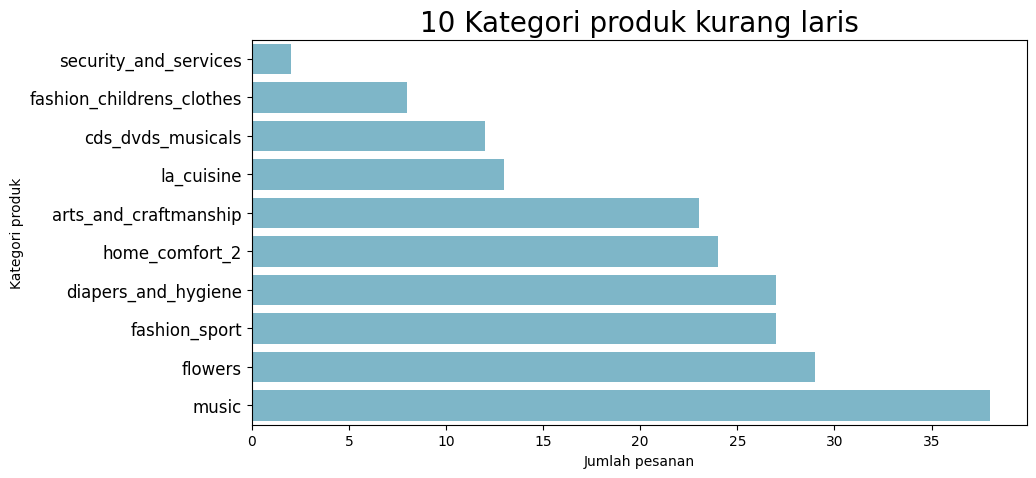

In [215]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x="order_id",
    y="product_category_name_english",
    data=bad_sell_df.sort_values(by='order_id', ascending=True),
    color="#72BCD4"
)
plt.title("10 Kategori produk kurang laris", loc="center", fontsize=20)
plt.ylabel("Kategori produk")
plt.xlabel("Jumlah pesanan")
plt.tick_params(axis='y', labelsize=12)
plt.show()

##Pertanyaan 4:

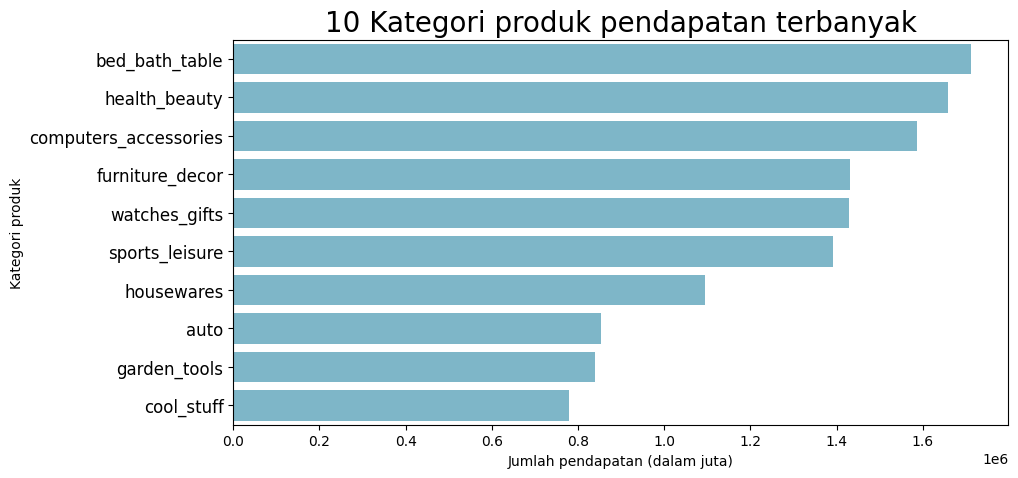

In [216]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x="payment_value",
    y="product_category_name_english",
    data=top_revenue_df,
    color="#72BCD4"
)
plt.title("10 Kategori produk pendapatan terbanyak", loc="center", fontsize=20)
plt.ylabel("Kategori produk")
plt.xlabel("Jumlah pendapatan (dalam juta)")
plt.tick_params(axis='y', labelsize=12)
plt.show()

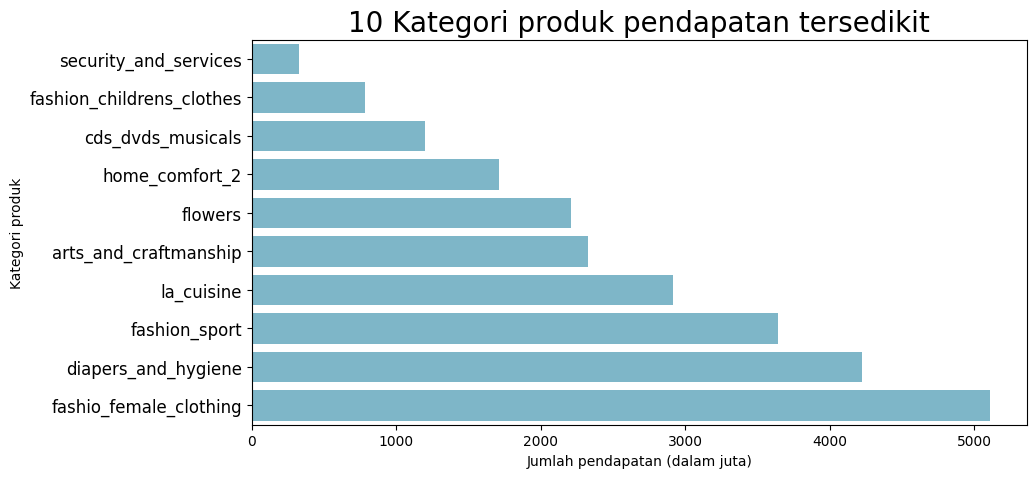

In [217]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x="payment_value",
    y="product_category_name_english",
    data=bad_revenue_df.sort_values(by='payment_value', ascending=True),
    color="#72BCD4"
)
plt.title("10 Kategori produk pendapatan tersedikit", loc="center", fontsize=20)
plt.ylabel("Kategori produk")
plt.xlabel("Jumlah pendapatan (dalam juta)")
plt.tick_params(axis='y', labelsize=12)
plt.show()

##Pertanyaan 5-7

<ipython-input-218-cd08ac85b743>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="customer_unique_id", x="recency", data=rfm.sort_values(by="recency", ascending=True).head(5), palette=colors)


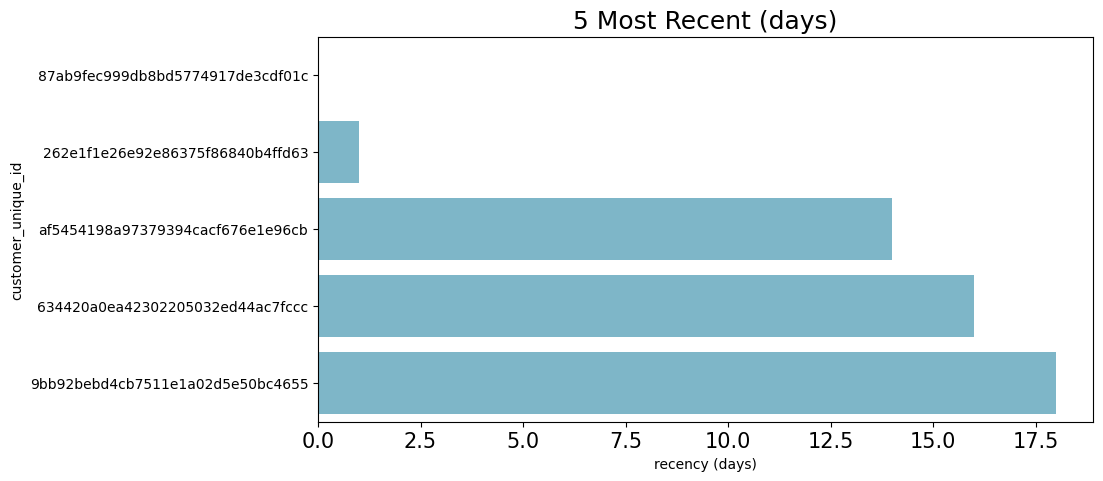

In [218]:
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
plt.figure(figsize=(10, 5))

sns.barplot(y="customer_unique_id", x="recency", data=rfm.sort_values(by="recency", ascending=True).head(5), palette=colors)
plt.ylabel("customer_unique_id")
plt.xlabel("recency (days)")
plt.title("5 Most Recent (days)", loc="center", fontsize=18)
plt.tick_params(axis ='x', labelsize=15)
plt.show()


<ipython-input-219-7be5544a5733>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="customer_unique_id", x="frequency", data=rfm.sort_values(by="frequency", ascending=False).head(5), palette=colors)


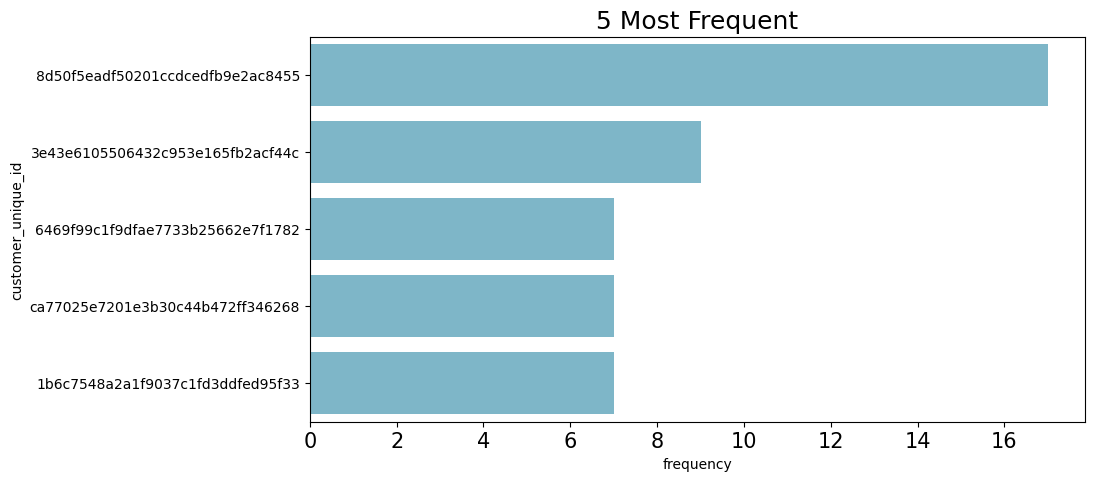

In [219]:
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
plt.figure(figsize=(10, 5))

sns.barplot(y="customer_unique_id", x="frequency", data=rfm.sort_values(by="frequency", ascending=False).head(5), palette=colors)
plt.ylabel("customer_unique_id")
plt.xlabel("frequency")
plt.title("5 Most Frequent", loc="center", fontsize=18)
plt.tick_params(axis='x', labelsize=15)
plt.show()


<ipython-input-220-486c8d967883>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="customer_unique_id", x="monetary", data=rfm.sort_values(by="monetary", ascending=False).head(5), palette=colors)


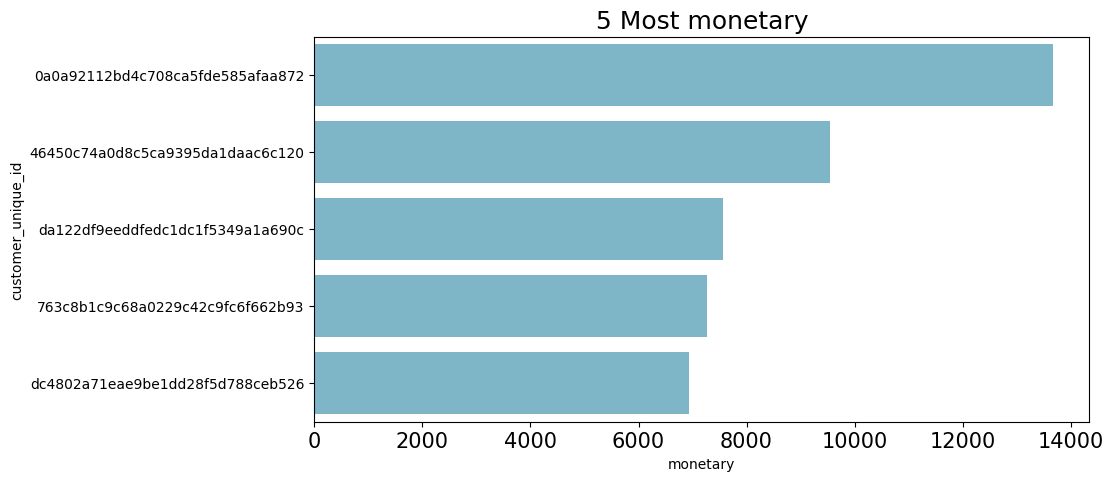

In [220]:
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
plt.figure(figsize=(10, 5))

sns.barplot(y="customer_unique_id", x="monetary", data=rfm.sort_values(by="monetary", ascending=False).head(5), palette=colors)
plt.ylabel("customer_unique_id")
plt.xlabel("monetary")
plt.title("5 Most monetary", loc="center", fontsize=18)
plt.tick_params(axis='x', labelsize=15)
plt.show()

In [221]:
grouped_orders_2017_df.to_csv("grouped_orders_2017.csv", index=True)
grouped_orders_2018_df.to_csv("grouped_orders_2018.csv", index=True)
grouped_revenue_2017_df.to_csv("grouped_revenue_2017.csv", index=True)
grouped_revenue_2018_df.to_csv("grouped_revenue_2018.csv", index=True)
top_sell_df.to_csv("top_sell.csv", index=True)
bad_sell_df.to_csv("bad_sell.csv", index=True)
top_revenue_df.to_csv("top_revenue.csv", index=True)
bad_revenue_df.to_csv("bad_revenue.csv", index=True)
rfm.to_csv("rfm.csv",index=True)

## Conclusion

**Performa Pemesanan**

1) Bagaimana tingkat jumlah pemesanan per bulan pada tahun 2017 dan 2018?

Pada tahun 2017 jumlah pemesanan perbulan relatif naik dengan jumlah pemesanan tertinggi pada bulan November, sementara jumlah pemesanan per bulan pada tahun 2018 relatif menurun dengan jumlah pemesanan paling sedikit pada bulan September dan Oktober

**Performa Pendapatan**

2) Bagaimana tingkat pendapatan per bulan pada tahun 2017 dan 2018?

Tingkat pendapatan per bulan pada tahun 2017 relatif naik dengan jumlah pendapatan tertinggi pada bulan November, sementara pendapatan per bulan pada tahun 2018 relatif turun dengan jumlah pendapatan paling sedikit pada bulan September dan Oktober

**Performa Setiap Kategori**

3) Apa kategori produk yang paling banyak terjual dan paling sedikit terjual?

Kategori produk paling banyak terjual adalah bed_bath_table sementara paling sedikit terjual adalah security_and_services

4) Apa kategori produk dengan pendapatan terbanyak dan tersedikit?

Kategori produk dengan pendapatan paling banyak adalah bed_bath_table sementara paling sedikit adalah security_and_services

**RFM Analysis**

5) Kapan terakhir pelanggan melakukan transaksi?

Paling cepat adalah 0 hari, yaitu pada hari yang sama pelanggan melakukan lebih dari satu transaksi

6) Seberapa sering seorang pelanggan melakukan pembelian?

Pelanggan yang paling sering melakukan pembelian melakukan 17 kali transaksi

7) Berapa banyak uang yang dihabiskan pelanggan?

Pelanggan paling banyak menghabiskan uang sebesar 13664.08